In [1]:
import pandas as pd
import numpy as np
import pandas_profiling

#Import libs
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
%matplotlib inline

import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

print("Setup Complete")

Setup Complete


In [2]:
kaggle2020 = pd.read_csv('Data.csv')

In [3]:
# kaggle2020.head()

In [4]:
figtext_arg = dict(
            horizontalalignment='center',
            fontsize=12,
            wrap=True,
            alpha=0.65
)

In [5]:
def percent(row, total):
    row.Percent = (row.Count/total[row.Year])
    return row

In [6]:
ages = kaggle2020[['Age', 'Gender']]

#[Year, Gender]
agesPerYear = pd.concat([
    ages.Gender.value_counts()], 
    keys=['2020'], 
    names=["Year", "Gender"]
).reset_index(name="Count")

agesPerYear = agesPerYear.replace({'Male':'Man', 'Female':'Woman'})

agesPerYearSum = agesPerYear.groupby('Year').Count.sum()

agesPerYear['Percent'] = pd.Series(dtype='float64')
agesPerYear = agesPerYear.apply(percent, args=(agesPerYearSum,), axis=1)
agesPerYear = agesPerYear.sort_values(by=['Year','Percent'], ascending=[True, False])
agesPerYear.loc[(agesPerYear.Year == '2020')][['Gender','Count']].sort_values('Count')

,Gender,Count
4,Nonbinary,52
3,Prefer to self-describe,54
2,Prefer not to say,263
1,Woman,3878
0,Man,15789


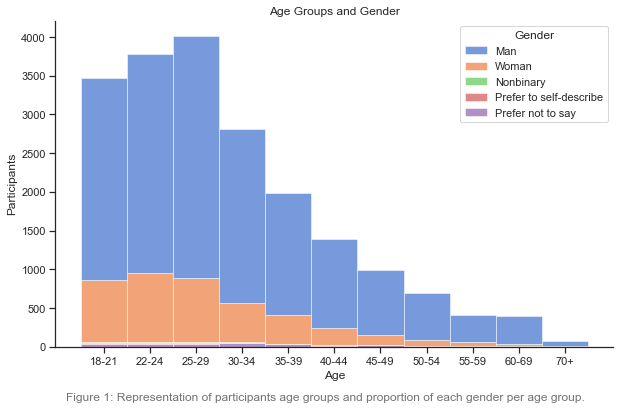

In [7]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10,6))
sns.despine(f)

ages = ages.sort_values(by=['Age','Gender'])
sns.histplot(
    ages,
    x="Age", hue="Gender", hue_order=['Man','Woman', 'Nonbinary','Prefer to self-describe', 'Prefer not to say'],
    multiple="stack",
    palette="muted",
    log_scale=False,
    linewidth= .5
)

plt.ylabel('Participants')

plt.title("Age Groups and Gender")

plt.figtext(0.5,0,
            "Figure 1: Representation of participants age groups and proportion of each gender per age group.",
            **figtext_arg
           )
plt.show()

## 프로그래밍 언어 사용

In [66]:
pd.set_option('display.max_row', 80)
pd.set_option('display.max_columns', 100)
# pd.Series(list(kaggle2020.columns))

In [67]:
col_list = list(kaggle2020.columns)

In [68]:
# col_list[12:25]

In [69]:
# kaggle2020[col_list[12]].value_counts()

In [70]:
language_val = []
for i in range(12,25):
    language_val.append(int(kaggle2020[col_list[i]].value_counts()))

language_val

[15530, 4277, 7535, 3315, 3827, 3367, 2995, 262, 198, 1776, 2217, 206, 1945]

In [71]:
# kaggle2020[col_list[22]].unique()

In [72]:
language = []
for i in range(12,25):
    language.append(kaggle2020[col_list[i]].unique()[0])

language[4] = 'C++'
language[5] = 'Java'
language[7] = 'Julia'
language[8] = 'Swift'
language[9] = 'Bash'
language[11] = 'None'

# language

In [73]:
values = language_val
columns = language

In [74]:
# python = list(kaggle2020['Q7_Part_1'].value_counts())

In [75]:
Lan_df = pd.DataFrame({"Language":language,
                  "Values":language_val})
# Lan_df

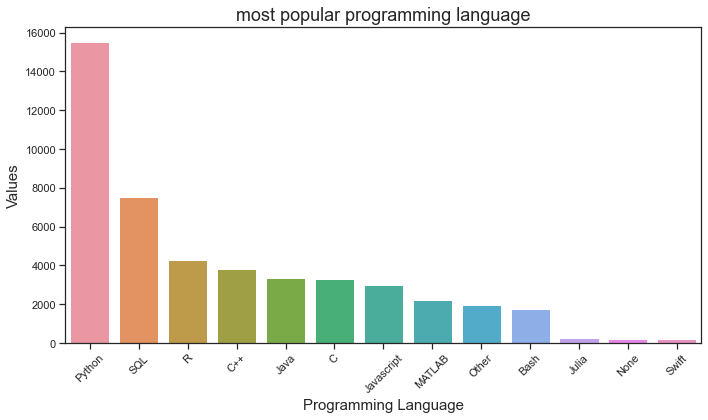

In [76]:
plt.figure(figsize=(10,6))
# make barplot
sns.barplot(x='Language', y="Values", data=Lan_df, order=Lan_df.sort_values('Values', ascending=False).Language)
# set labels
plt.xlabel("Programming Language", size=15)
plt.ylabel("Values", size=15)
plt.title("most popular programming language", size=18)
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("language.png", dpi=100)

## 시각화 라이브러리 (Q14)

In [77]:
# pd.Series(list(kaggle2020.columns))

In [78]:
col_list = list(kaggle2020.columns)

In [79]:
col_list[25:37]

['Q14_Part_1',
 'Q14_Part_2',
 'Q14_Part_3',
 'Q14_Part_4',
 'Q14_Part_5',
 'Q14_Part_6',
 'Q14_Part_7',
 'Q14_Part_8',
 'Q14_Part_9',
 'Q14_Part_10',
 'Q14_Part_11',
 'Q14_OTHER']

In [80]:
# kaggle2020[col_list[12]].value_counts()

In [81]:
val = []
for i in range(25,37):
    val.append(int(kaggle2020[col_list[i]].value_counts()))

val

[12342, 8821, 4130, 4120, 1137, 829, 233, 920, 850, 596, 1897, 565]

In [82]:
# type(list(kaggle2020[col_list[26]].unique())[1])

In [83]:
# list(kaggle2020[col_list[26]].unique())[1]

In [84]:
col = []
for i in range(25,37):
    if type(list(kaggle2020[col_list[i]].unique())[0]) != str:
        col.append(kaggle2020[col_list[i]].unique()[1])
    else:
        col.append(kaggle2020[col_list[i]].unique()[0])

col

[' Matplotlib ',
 ' Seaborn ',
 ' Plotly / Plotly Express ',
 ' Ggplot / ggplot2 ',
 ' Shiny ',
 ' D3 js ',
 ' Altair ',
 ' Bokeh ',
 ' Geoplotlib ',
 ' Leaflet / Folium ',
 'None',
 'Other']

In [85]:
values = val
columns = col

In [86]:
# python = list(kaggle2020['Q7_Part_1'].value_counts())

In [87]:
df = pd.DataFrame({"Visualization_library":col,
                  "Values":val})
# df

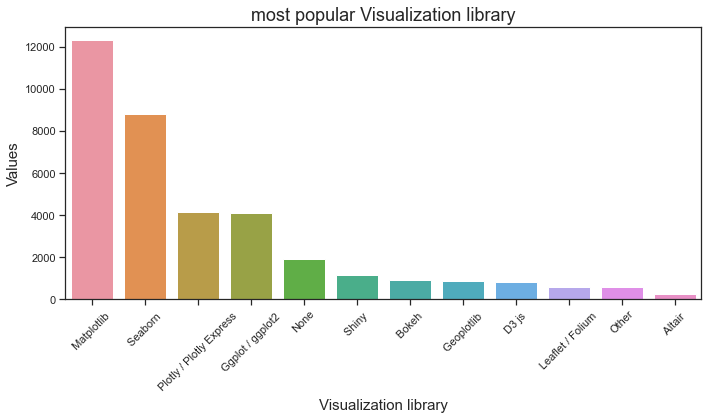

In [88]:
plt.figure(figsize=(10,6))
# make barplot
sns.barplot(x='Visualization_library', y="Values", data=df, order=df.sort_values('Values', ascending=False).Visualization_library)
# set labels
plt.xlabel("Visualization library", size=15)
plt.ylabel("Values", size=15)
plt.title("most popular Visualization library", size=18)
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("visualization.png", dpi=100)

## 머신러닝 라이브러리 (Q16)

In [89]:
# pd.Series(list(kaggle2020.columns))

In [90]:
col_list = list(kaggle2020.columns)

In [91]:
col_list[37:53]

['Q16_Part_1',
 'Q16_Part_2',
 'Q16_Part_3',
 'Q16_Part_4',
 'Q16_Part_5',
 'Q16_Part_6',
 'Q16_Part_7',
 'Q16_Part_8',
 'Q16_Part_9',
 'Q16_Part_10',
 'Q16_Part_11',
 'Q16_Part_12',
 'Q16_Part_13',
 'Q16_Part_14',
 'Q16_Part_15',
 'Q16_OTHER']

In [92]:
# kaggle2020[col_list[12]].value_counts()

In [93]:
val = []
for i in range(37,53):
    val.append(int(kaggle2020[col_list[i]].value_counts()))

val

[10250,
 6934,
 6192,
 4189,
 742,
 218,
 3935,
 1799,
 957,
 532,
 344,
 939,
 484,
 84,
 1208,
 371]

In [94]:
# type(list(kaggle2020[col_list[26]].unique())[1])

In [95]:
# list(kaggle2020[col_list[26]].unique())[1]

In [96]:
col = []
for i in range(37,53):
    if type(list(kaggle2020[col_list[i]].unique())[0]) != str:
        col.append(kaggle2020[col_list[i]].unique()[1])
    else:
        col.append(kaggle2020[col_list[i]].unique()[0])

col

['  Scikit-learn ',
 '  TensorFlow ',
 ' Keras ',
 ' PyTorch ',
 ' Fast.ai ',
 ' MXNet ',
 ' Xgboost ',
 ' LightGBM ',
 ' CatBoost ',
 ' Prophet ',
 ' H2O 3 ',
 ' Caret ',
 ' Tidymodels ',
 ' JAX ',
 'None',
 'Other']

In [97]:
values = val
columns = col

In [98]:
# python = list(kaggle2020['Q7_Part_1'].value_counts())

In [99]:
df = pd.DataFrame({"ML_library":col,
                  "Values":val})
# df

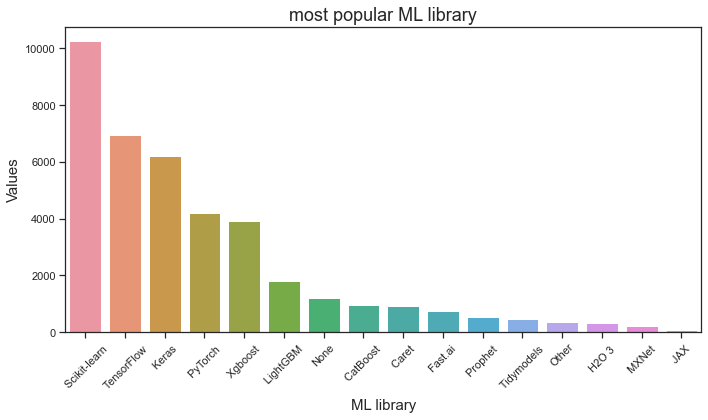

In [100]:
plt.figure(figsize=(10,6))
# make barplot
sns.barplot(x='ML_library', y="Values", data=df, order=df.sort_values('Values', ascending=False).ML_library)
# set labels
plt.xlabel("ML library", size=15)
plt.ylabel("Values", size=15)
plt.title("most popular ML library", size=18)
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("ML.png", dpi=100)

## 머신러닝 알고리즘 (Q17)

In [42]:
# pd.Series(list(kaggle2020.columns))

In [43]:
col_list = list(kaggle2020.columns)

In [44]:
col_list[53:65]

['Q17_Part_1',
 'Q17_Part_2',
 'Q17_Part_3',
 'Q17_Part_4',
 'Q17_Part_5',
 'Q17_Part_6',
 'Q17_Part_7',
 'Q17_Part_8',
 'Q17_Part_9',
 'Q17_Part_10',
 'Q17_Part_11',
 'Q17_OTHER']

In [45]:
# kaggle2020[col_list[12]].value_counts()

In [46]:
val = []
for i in range(53,65):
    val.append(int(kaggle2020[col_list[i]].value_counts()))

val

[10560, 8804, 5134, 3647, 731, 3364, 5859, 1024, 3468, 1298, 736, 410]

In [47]:
# type(list(kaggle2020[col_list[26]].unique())[1])

In [48]:
# list(kaggle2020[col_list[26]].unique())[1]

In [49]:
col = []
for i in range(53,65):
    if type(list(kaggle2020[col_list[i]].unique())[0]) != str:
        col.append(kaggle2020[col_list[i]].unique()[1])
    else:
        col.append(kaggle2020[col_list[i]].unique()[0])

col

['Linear or Logistic Regression',
 'Decision Trees or Random Forests',
 'Gradient Boosting Machines (xgboost, lightgbm, etc)',
 'Bayesian Approaches',
 'Evolutionary Approaches',
 'Dense Neural Networks (MLPs, etc)',
 'Convolutional Neural Networks',
 'Generative Adversarial Networks',
 'Recurrent Neural Networks',
 'Transformer Networks (BERT, gpt-3, etc)',
 'None',
 'Other']

In [50]:
values = val
columns = col

In [51]:
# python = list(kaggle2020['Q7_Part_1'].value_counts())

In [52]:
df = pd.DataFrame({"ML_algorithm":col,
                  "Values":val})
# df

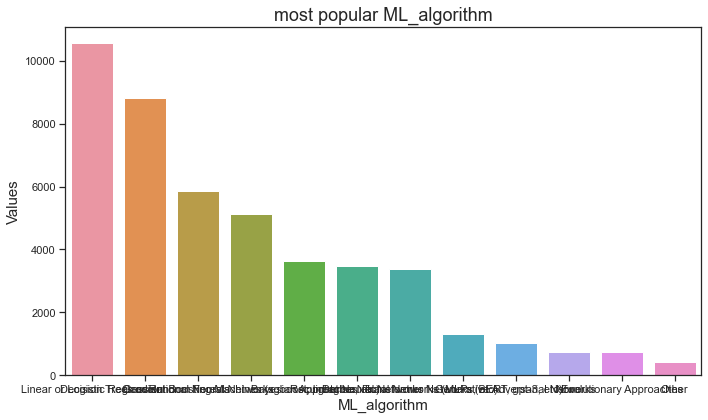

In [53]:
plt.figure(figsize=(10,6))
# make barplot
sns.barplot(x='ML_algorithm', y="Values", data=df, order=df.sort_values('Values', ascending=False).ML_algorithm)
# set labels
plt.xlabel("ML_algorithm", size=15)
plt.ylabel("Values", size=15)
plt.title("most popular ML_algorithm", size=18)
plt.tight_layout()
# plt.savefig("barplot_Seaborn_Python.png", dpi=100)